<a href="https://colab.research.google.com/github/AbdurRafiq/Data-Science-Projects/blob/master/DropStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv("/content/drive/My Drive/code/DataForAbir.csv")
df.head(100)

,id,facultyShortName,departmentShortName,programShortName,PreviousResult,ParentsTotalIncome,gender_maritalStatus_calculation,no_of_drop_semester,no_course_need_to_retake,mentors_feedback,Attendance,SGPA,assignment,presentation,dueAmount,dropoutStatus
0,1,FSIT,MCT,B.Sc. in MCT,80.0,24.0,Positive,0.000000,0,Positive,1000.0000,2000.00,2285.714286,1600.0,91.43750,Yellow
1,2,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Positive,1000.0000,2000.00,2285.714286,1600.0,12.46500,Green
2,3,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Neutral,1000.0000,2000.00,2285.714286,1600.0,62.38750,Green
3,4,FSIT,MCT,B.Sc. in MCT,80.0,120.0,Positive,0.000000,0,Positive,10.7000,12.05,11.428571,10.0,67.25000,Red
4,5,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,66.666667,0,Positive,1000.0000,2000.00,2285.714286,1600.0,100.00000,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,FSIT,MCT,B.Sc. in MCT,77.5,0.0,Positive,100.000000,100,Positive,54.6500,83.15,102.857143,99.0,27.36375,Green
96,97,FSIT,MCT,B.Sc. in MCT,89.2,0.0,Positive,100.000000,0,Positive,70.4125,78.25,97.142857,98.6,51.23750,Green
97,98,FSIT,MCT,B.Sc. in MCT,78.3,0.0,Positive,100.000000,100,Positive,74.8375,98.25,111.428571,112.6,33.44375,Green
98,99,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,100,Neutral,71.6750,86.45,100.000000,112.6,23.23250,Green


In [ ]:
df.shape

(19232, 16)

In [ ]:
df.dtypes

id                                    int64
facultyShortName                     object
departmentShortName                  object
programShortName                     object
PreviousResult                      float64
ParentsTotalIncome                  float64
gender_maritalStatus_calculation     object
no_of_drop_semester                 float64
no_course_need_to_retake              int64
mentors_feedback                     object
Attendance                          float64
SGPA                                float64
assignment                          float64
presentation                        float64
dueAmount                           float64
dropoutStatus                        object
dtype: object

In [ ]:
df.describe(include="all")

,id,facultyShortName,departmentShortName,programShortName,PreviousResult,ParentsTotalIncome,gender_maritalStatus_calculation,no_of_drop_semester,no_course_need_to_retake,mentors_feedback,Attendance,SGPA,assignment,presentation,dueAmount,dropoutStatus
count,19232.000000,19232,19197,19232,19232.000000,1.923200e+04,19232,19232.000000,19232.000000,19232,19232.000000,19232.000000,19232.000000,19232.000000,19232.000000,19232
unique,NaN,5,23,32,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3
top,NaN,FSIT,CSE,B.Sc. in CSE,NaN,NaN,Positive,NaN,NaN,Positive,NaN,NaN,NaN,NaN,NaN,Green
freq,NaN,9056,6635,6575,NaN,NaN,16336,NaN,NaN,10936,NaN,NaN,NaN,NaN,NaN,17133
mean,9616.500000,NaN,NaN,NaN,73.763519,2.235204e+03,NaN,94.720605,69.138675,NaN,120.764572,181.346981,227.177798,182.606701,79.403951,NaN
std,5551.944524,NaN,NaN,NaN,306.230506,2.885395e+05,NaN,25.612030,39.889548,NaN,210.436816,433.960633,493.124940,338.997657,27.252990,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4808.750000,NaN,NaN,NaN,71.900000,0.000000e+00,NaN,100.000000,50.000000,NaN,61.421875,73.635417,91.428571,92.000000,66.250000,NaN
50%,9616.500000,NaN,NaN,NaN,79.200000,0.000000e+00,NaN,100.000000,100.000000,NaN,74.993750,84.225000,106.122449,108.000000,93.750000,NaN
75%,14424.250000,NaN,NaN,NaN,84.200000,4.000000e+01,NaN,100.000000,100.000000,NaN,85.812500,92.025000,126.428571,122.800000,100.000000,NaN


In [ ]:
df.isnull( )

,id,facultyShortName,departmentShortName,programShortName,PreviousResult,ParentsTotalIncome,gender_maritalStatus_calculation,no_of_drop_semester,no_course_need_to_retake,mentors_feedback,Attendance,SGPA,assignment,presentation,dueAmount,dropoutStatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19228,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.notnull().values.any()

True

In [ ]:
df.corr()

,id,PreviousResult,ParentsTotalIncome,no_of_drop_semester,no_course_need_to_retake,Attendance,SGPA,assignment,presentation,dueAmount
id,1.000000,-0.024053,-0.009628,-0.178346,-0.054377,-0.254487,-0.259438,-0.260267,-0.269847,0.032249
PreviousResult,-0.024053,1.000000,0.000363,-0.009826,-0.010254,0.004940,0.005987,0.005614,0.006633,-0.002651
ParentsTotalIncome,-0.009628,0.000363,1.000000,0.001644,0.005629,-0.001603,-0.001633,-0.001766,-0.001349,0.005322
no_of_drop_semester,-0.178346,-0.009826,0.001644,1.000000,0.095978,0.065425,0.050660,0.050818,0.058040,0.172230
no_course_need_to_retake,-0.054377,-0.010254,0.005629,0.095978,1.000000,0.117123,0.103371,0.103701,0.115205,0.157076
Attendance,-0.254487,0.004940,-0.001603,0.065425,0.117123,1.000000,0.997896,0.995145,0.996765,0.060247
SGPA,-0.259438,0.005987,-0.001633,0.050660,0.103371,0.997896,1.000000,0.995880,0.998259,0.049738
assignment,-0.260267,0.005614,-0.001766,0.050818,0.103701,0.995145,0.995880,1.000000,0.994530,0.038696
presentation,-0.269847,0.006633,-0.001349,0.058040,0.115205,0.996765,0.998259,0.994530,1.000000,0.055638
dueAmount,0.032249,-0.002651,0.005322,0.172230,0.157076,0.060247,0.049738,0.038696,0.055638,1.000000


In [ ]:
df["dropoutStatus"].value_counts().to_frame()

,dropoutStatus
Green,17133
Yellow,1385
Red,714


In [ ]:
target= df.drop(columns=["dropoutStatus"])

In [ ]:
mapping_dict = {"dropoutStatus":{
"Green": 0,
"Red": 1,
"Yellow": 2,
}}

In [ ]:
df = df.replace(mapping_dict)

In [ ]:
df.head(10)

,id,facultyShortName,departmentShortName,programShortName,PreviousResult,ParentsTotalIncome,gender_maritalStatus_calculation,no_of_drop_semester,no_course_need_to_retake,mentors_feedback,Attendance,SGPA,assignment,presentation,dueAmount,dropoutStatus
0,1,FSIT,MCT,B.Sc. in MCT,80.0,24.0,Positive,0.000000,0,Positive,1000.00,2000.000,2285.714286,1600.0,91.4375,2
1,2,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Positive,1000.00,2000.000,2285.714286,1600.0,12.4650,0
2,3,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Neutral,1000.00,2000.000,2285.714286,1600.0,62.3875,0
3,4,FSIT,MCT,B.Sc. in MCT,80.0,120.0,Positive,0.000000,0,Positive,10.70,12.050,11.428571,10.0,67.2500,1
4,5,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,66.666667,0,Positive,1000.00,2000.000,2285.714286,1600.0,100.0000,0
5,6,FSIT,MCT,B.Sc. in MCT,80.0,54.0,Positive,0.000000,0,Neutral,27.35,20.175,60.000000,46.0,61.6875,1
6,7,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,0.000000,0,Positive,13.35,63.100,80.000000,83.0,68.5225,2
7,8,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,0.000000,0,Positive,10.00,4.350,12.857143,6.0,100.0000,1
8,18,FSIT,MCT,B.Sc. in MCT,80.0,24.0,Positive,0.000000,25,Positive,1000.00,2000.000,2285.714286,1600.0,98.7850,2
9,19,FSIT,MCT,B.Sc. in MCT,80.0,80.0,Positive,0.000000,0,Positive,1000.00,2000.000,2285.714286,1600.0,83.3625,0


In [ ]:
df_variables= df.drop(columns=["dropoutStatus"])

In [ ]:
df_variables.head()

,id,facultyShortName,departmentShortName,programShortName,PreviousResult,ParentsTotalIncome,gender_maritalStatus_calculation,no_of_drop_semester,no_course_need_to_retake,mentors_feedback,Attendance,SGPA,assignment,presentation,dueAmount
0,1,FSIT,MCT,B.Sc. in MCT,80.0,24.0,Positive,0.000000,0,Positive,1000.0,2000.00,2285.714286,1600.0,91.4375
1,2,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Positive,1000.0,2000.00,2285.714286,1600.0,12.4650
2,3,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,100.000000,0,Neutral,1000.0,2000.00,2285.714286,1600.0,62.3875
3,4,FSIT,MCT,B.Sc. in MCT,80.0,120.0,Positive,0.000000,0,Positive,10.7,12.05,11.428571,10.0,67.2500
4,5,FSIT,MCT,B.Sc. in MCT,80.0,0.0,Positive,66.666667,0,Positive,1000.0,2000.00,2285.714286,1600.0,100.0000


In [ ]:
encode_data=pd.get_dummies(df_variables)

In [ ]:
encode_data.head()

,id,PreviousResult,ParentsTotalIncome,no_of_drop_semester,no_course_need_to_retake,Attendance,SGPA,assignment,presentation,dueAmount,facultyShortName_FAHS,facultyShortName_FBE,facultyShortName_FEngr,facultyShortName_FHSS,facultyShortName_FSIT,departmentShortName_ARCH,departmentShortName_Business Admin,departmentShortName_Business Studies,departmentShortName_CE,departmentShortName_CIS,departmentShortName_CSE,departmentShortName_DS,departmentShortName_EEE,departmentShortName_ENG,departmentShortName_ESDM,departmentShortName_ETE,departmentShortName_EntrP,departmentShortName_ISLM,departmentShortName_JMC,departmentShortName_LAW,departmentShortName_MCT,departmentShortName_NFE,departmentShortName_Pharm,departmentShortName_Public Health,departmentShortName_Real Estate,departmentShortName_SWE,departmentShortName_TE,departmentShortName_THM,programShortName_B.A. in Eng,programShortName_B.Arch.,programShortName_B.B.A.,programShortName_B.Ent.,programShortName_B.Pharm.,programShortName_B.R.E.,programShortName_B.S.S. in JMC,programShortName_B.Sc. in CE,programShortName_B.Sc. in CIS,programShortName_B.Sc. in CSE,programShortName_B.Sc. in EEE,programShortName_B.Sc. in ESDM,programShortName_B.Sc. in ETE,programShortName_B.Sc. in MCT,programShortName_B.Sc. in NFE,programShortName_B.Sc. in SWE,programShortName_B.Sc. in TE,programShortName_B.T.H.M.,programShortName_BBS,programShortName_ITM,programShortName_L.L.B.-H,programShortName_L.L.M.-F,programShortName_M.A. in Eng(F),programShortName_M.B.A.(E),programShortName_M.B.A.(R),programShortName_M.P.H.,programShortName_M.S. in MIS,programShortName_M.S.S. in JMC,programShortName_M.Sc. in CSE,programShortName_M.Sc. in SWE,programShortName_MDS,programShortName_PGDISLM,gender_maritalStatus_calculation_Negative,gender_maritalStatus_calculation_Positive,mentors_feedback_Critical,mentors_feedback_Negative,mentors_feedback_Neutral,mentors_feedback_Positive
0,1,80.0,24.0,0.000000,0,1000.0,2000.00,2285.714286,1600.0,91.4375,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,80.0,0.0,100.000000,0,1000.0,2000.00,2285.714286,1600.0,12.4650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,80.0,0.0,100.000000,0,1000.0,2000.00,2285.714286,1600.0,62.3875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,4,80.0,120.0,0.000000,0,10.7,12.05,11.428571,10.0,67.2500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,5,80.0,0.0,66.666667,0,1000.0,2000.00,2285.714286,1600.0,100.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
encode_data["dropoutStatus"] = df["dropoutStatus"]

In [ ]:
encode_data.head(5)

,id,PreviousResult,ParentsTotalIncome,no_of_drop_semester,no_course_need_to_retake,Attendance,SGPA,assignment,presentation,dueAmount,facultyShortName_FAHS,facultyShortName_FBE,facultyShortName_FEngr,facultyShortName_FHSS,facultyShortName_FSIT,departmentShortName_ARCH,departmentShortName_Business Admin,departmentShortName_Business Studies,departmentShortName_CE,departmentShortName_CIS,departmentShortName_CSE,departmentShortName_DS,departmentShortName_EEE,departmentShortName_ENG,departmentShortName_ESDM,departmentShortName_ETE,departmentShortName_EntrP,departmentShortName_ISLM,departmentShortName_JMC,departmentShortName_LAW,departmentShortName_MCT,departmentShortName_NFE,departmentShortName_Pharm,departmentShortName_Public Health,departmentShortName_Real Estate,departmentShortName_SWE,departmentShortName_TE,departmentShortName_THM,programShortName_B.A. in Eng,programShortName_B.Arch.,programShortName_B.B.A.,programShortName_B.Ent.,programShortName_B.Pharm.,programShortName_B.R.E.,programShortName_B.S.S. in JMC,programShortName_B.Sc. in CE,programShortName_B.Sc. in CIS,programShortName_B.Sc. in CSE,programShortName_B.Sc. in EEE,programShortName_B.Sc. in ESDM,programShortName_B.Sc. in ETE,programShortName_B.Sc. in MCT,programShortName_B.Sc. in NFE,programShortName_B.Sc. in SWE,programShortName_B.Sc. in TE,programShortName_B.T.H.M.,programShortName_BBS,programShortName_ITM,programShortName_L.L.B.-H,programShortName_L.L.M.-F,programShortName_M.A. in Eng(F),programShortName_M.B.A.(E),programShortName_M.B.A.(R),programShortName_M.P.H.,programShortName_M.S. in MIS,programShortName_M.S.S. in JMC,programShortName_M.Sc. in CSE,programShortName_M.Sc. in SWE,programShortName_MDS,programShortName_PGDISLM,gender_maritalStatus_calculation_Negative,gender_maritalStatus_calculation_Positive,mentors_feedback_Critical,mentors_feedback_Negative,mentors_feedback_Neutral,mentors_feedback_Positive,dropoutStatus
0,1,80.0,24.0,0.000000,0,1000.0,2000.00,2285.714286,1600.0,91.4375,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2
1,2,80.0,0.0,100.000000,0,1000.0,2000.00,2285.714286,1600.0,12.4650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,80.0,0.0,100.000000,0,1000.0,2000.00,2285.714286,1600.0,62.3875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,80.0,120.0,0.000000,0,10.7,12.05,11.428571,10.0,67.2500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,5,80.0,0.0,66.666667,0,1000.0,2000.00,2285.714286,1600.0,100.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Text(0, 0.5, 'Frequency')

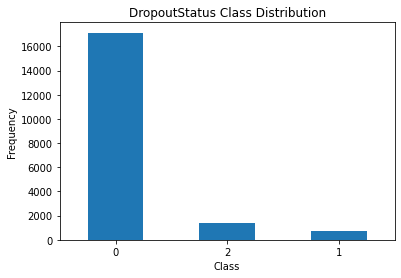

In [ ]:
count_classes = pd.value_counts(encode_data['dropoutStatus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("DropoutStatus Class Distribution")



plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
green = encode_data[encode_data['dropoutStatus']==0]

red = encode_data[encode_data['dropoutStatus']==1]
yellow = encode_data[encode_data['dropoutStatus']==2]

In [ ]:
print(green.shape,red.shape,yellow.shape)

(17133, 77) (714, 77) (1385, 77)


In [ ]:
X = encode_data.drop("dropoutStatus",axis = 1)
y = encode_data["dropoutStatus"]

In [ ]:
print(X.shape)
print(y.shape)

(19232, 76)
(19232,)


In [ ]:
encode_data.shape

(19232, 77)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [ ]:

y_train.value_counts()

0    11998
2      959
1      505
Name: dropoutStatus, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
nm = NearMiss()
X_res,y_res, =nm.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:

X_res.shape,y_res.shape

((1515, 76), (1515,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 17133, 2: 1385, 1: 714})
Resampled dataset shape Counter({0: 505, 1: 505, 2: 505})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5086    0   49]
 [   0  185   24]
 [  70   21  335]]
0.97157712305026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5135
           1       0.90      0.89      0.89       209
           2       0.82      0.79      0.80       426

    accuracy                           0.97      5770
   macro avg       0.90      0.89      0.89      5770
weighted avg       0.97      0.97      0.97      5770

